In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [30]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.4&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.5&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.6&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.7&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.9&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=1.0&num_states=1&num_tasks=15&period=[50, 100]&task_ma

In [31]:
cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [32]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [33]:
print(orig)
print(wo_drop)
print(ours)

[7.552, 7.612, 7.504, 7.584, 7.55, 7.514, 7.54, 7.576, 7.542, 7.562, 7.524]
[3.968, 6.454, 7.306, 8.116, 8.616, 8.804, 9.158, 9.462, 9.58, 9.338, 7.524]
[3.968, 4.054, 4.076, 4.214, 4.334, 4.53, 4.976, 5.546, 6.096, 6.83, 7.524]


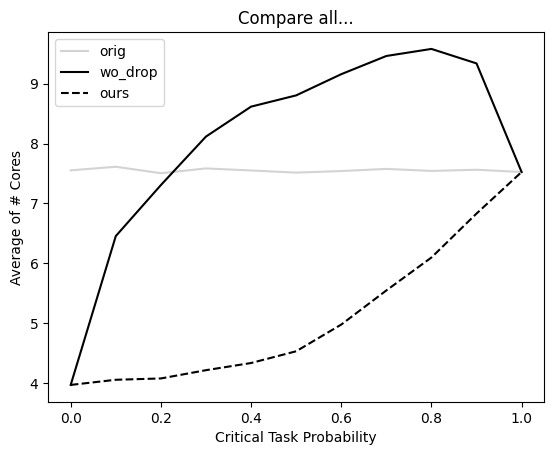

In [34]:
plt.plot(criticality_prob_list, orig, label='orig', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='ours', color='black', linestyle='dashed')

plt.title('Compare all...')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()